In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data_dynamic = pd.read_csv(r"06.2.w_e_050321_fcdDynamicData.csv")
data_static = pd.read_csv(r"06.2.w_e_fcdStaticData.csv")
data_dynamic

,discoveryTime,segmentId,travelTime,coverage
0,2021-03-05 00:00:00,131016,1576,10
1,2021-03-05 00:00:00,134879,1311,10
2,2021-03-05 00:00:00,135146,1539,10
3,2021-03-05 00:00:00,182928,1769,10
4,2021-03-05 00:00:00,182929,1769,10
...,...,...,...,...
88401,2021-03-05 23:55:00,7425668,3062,10
88402,2021-03-05 23:55:00,7425669,3062,10
88403,2021-03-05 23:55:00,7452950,3480,10
88404,2021-03-05 23:55:00,7452951,2036,10


In [2]:

data_static.sort_values(by = "segmentId", ascending=True)

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()

data_static["segmentId"] = le1.fit_transform(data_static["segmentId"])

In [3]:
data_static.sort_values(by = "segmentId", ascending=True)


,segmentId,lengthmm,speedLimitKph
182,0,30651,70
285,1,25508,70
272,2,29935,70
283,3,34413,70
282,4,34413,70
...,...,...,...
43,302,42529,50
42,303,42529,50
7,304,48346,50
6,305,28279,50


In [4]:

"""data_static.set_index("segmentId",inplace=True)

data_static.sort_index(axis=0, ascending=True)"""

'data_static.set_index("segmentId",inplace=True)\n\ndata_static.sort_index(axis=0, ascending=True)'

In [5]:
data_dynamic["coverage"] = 10

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_dynamic["discoveryTime"] = le.fit_transform(data_dynamic["discoveryTime"])
data_dynamic["discoveryTime"]

0          0
1          0
2          0
3          0
4          0
        ... 
88401    287
88402    287
88403    287
88404    287
88405    287
Name: discoveryTime, Length: 88406, dtype: int32

In [7]:
data_dynamic["segmentId"].sort_values()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_dynamic["segmentId"] = le.fit_transform(data_dynamic["segmentId"])
data_dynamic["segmentId"]

0          0
1          1
2          2
3          3
4          4
        ... 
88401    302
88402    303
88403    304
88404    305
88405    306
Name: segmentId, Length: 88406, dtype: int64

In [8]:
data_dynamic.head(310)

,discoveryTime,segmentId,travelTime,coverage
0,0,0,1576,10
1,0,1,1311,10
2,0,2,1539,10
3,0,3,1769,10
4,0,4,1769,10
...,...,...,...,...
305,0,305,2036,10
306,0,306,2036,10
307,1,0,1576,10
308,1,1,1311,10


<AxesSubplot:xlabel='discoveryTime'>

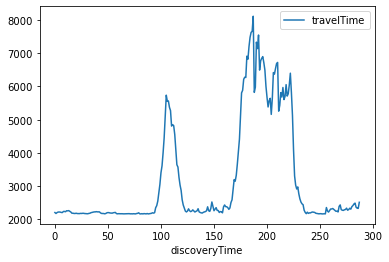

In [9]:
x_data = data_dynamic[["discoveryTime","travelTime"]]

x_data.groupby(by="discoveryTime").mean().plot()   



<AxesSubplot:xlabel='segmentId'>

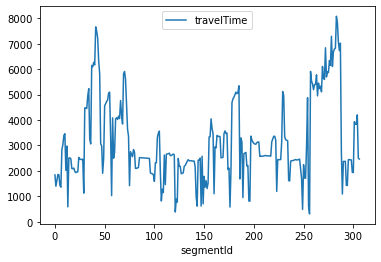

In [10]:
x_data1 = data_dynamic[["segmentId","travelTime"]]

x_data1.groupby(by="segmentId").mean().plot()   


In [11]:
data_son = data_dynamic.merge(data_static, on='segmentId', how='left') 
data_son["travelTime"] = data_son["travelTime"]*2.77777778 * (1/10000000)

data_son["lengthmm"] = data_son["lengthmm"]*(1/1000000)
data_son1 = data_son.drop("coverage", axis=1)

data_son12= pd.DataFrame(data_son1)
data_son12['speed'] = data_son1["lengthmm"] / data_son["travelTime"]
data_son12

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,0,0,0.000438,0.030651,70,70.014975
1,0,1,0.000364,0.025508,70,70.044851
2,0,2,0.000428,0.029935,70,70.023392
3,0,3,0.000491,0.034413,70,70.032108
4,0,4,0.000491,0.034413,70,70.032108
...,...,...,...,...,...,...
88401,287,302,0.000851,0.042529,50,50.001437
88402,287,303,0.000851,0.042529,50,50.001437
88403,287,304,0.000967,0.048346,50,50.013103
88404,287,305,0.000566,0.028279,50,50.002161


<AxesSubplot:xlabel='segmentId'>

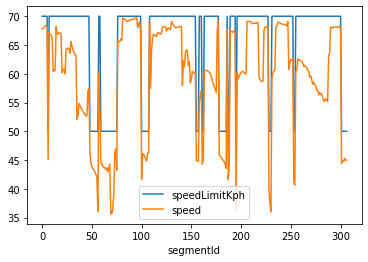

In [17]:
x_data2 = data_son12[["segmentId","speedLimitKph","speed"]]

x_data3 = x_data2.groupby(by="segmentId").mean()
x_data3.plot()



In [18]:
x_data3.sort_values("speed")


,speedLimitKph,speed
segmentId,,
69,50,35.629562
70,50,35.686930
230,50,35.981349
195,50,36.070947
56,50,36.078432
...,...,...
93,70,69.588631
82,70,69.616418
94,70,69.668489


In [21]:
df_segment = x_data3["speed"]<40

df1 = df_segment.reset_index()

df1.drop(df1[df1['speed'] == False].index, inplace=True)

df1["segmentId"].unique()


array([ 56,  69,  70,  71,  72, 195, 229, 230], dtype=int64)

In [24]:
def segmentId(k):
    df_segment = data_son12["segmentId"] == k

    dff = df_segment.reset_index()

    dff["ss"] = dff["segmentId"]

    dff1 = pd.concat((data_son12,dff),axis = 1)

    dff1.drop(dff1[dff1['ss'] == False].index, inplace=True)
    return dff1

In [27]:
dff1 = segmentId(56)



<AxesSubplot:xlabel='discoveryTime'>

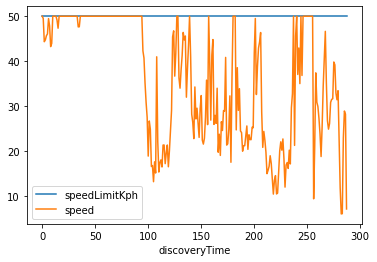

In [28]:
x_data5 = dff1[["discoveryTime","speedLimitKph","speed"]]

x_data5.set_index("discoveryTime")


x_data5.groupby(by="discoveryTime").mean().plot()



In [17]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(data_son1)

In [18]:
X

array([[-1.72617481, -1.72641539, -0.37953179,  0.        , -0.77501912,
         0.50291103],
       [-1.72617481, -1.71513205, -0.4434986 ,  0.        , -1.25021898,
         0.50291103],
       [-1.72617481, -1.70384871, -0.388463  ,  0.        , -0.84117566,
         0.50291103],
       ...,
       [ 1.72593807,  1.70372108,  0.08006371,  0.        ,  0.85995299,
        -1.98842329],
       [ 1.72593807,  1.71500442, -0.26849506,  0.        , -0.99418577,
        -1.98842329],
       [ 1.72593807,  1.72628776, -0.26849506,  0.        , -0.99418577,
        -1.98842329]])

In [19]:
X1 = X[0:5000,:]

In [20]:
"""import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X1, method = "ward"))"""

'import scipy.cluster.hierarchy as sch\n\ndendogram = sch.dendrogram(sch.linkage(X1, method = "ward"))'

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score



def control_k(k):
    
    for i in range(2,k):
        kmeans = KMeans(n_clusters = i, init='k-means++')
        kmeans.fit(X)
        y = kmeans.labels_

        print(" for k = {1}, silhouette_score_: {0}".format(silhouette_score(X,y, metric='euclidean'),i))
 
        print('for k = {1}, Davies Bouldin Score: {0}'.format(davies_bouldin_score(X,y),i))
        
control_k(10)


In [20]:
kmeans.labels_.shape

(88406,)

In [21]:
frame = pd.DataFrame(data_son1)
frame['cluster'] = kmeans.labels_
frame.head()

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,cluster
0,0,0,0.000438,0.030651,70,0
1,0,1,0.000364,0.025508,70,0
2,0,2,0.000428,0.029935,70,0
3,0,3,0.000491,0.034413,70,0
4,0,4,0.000491,0.034413,70,0


In [23]:
avg_df = data_son1.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph
0,0,142.642698,92.993087,0.000593,0.035436,70.000000
1,1,142.547677,133.302343,0.000978,0.036935,50.000000
2,2,195.259507,183.519527,0.007279,0.047055,67.769784
3,3,141.850087,238.579553,0.000761,0.044315,70.000000
